In [77]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [59]:
df = pd.read_csv('../data/daily_revenue.csv',index_col='date',parse_dates=True,dayfirst=True)
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%
2018-01-02,"8,922,076",30.87%,1.08%
2018-01-03,"8,446,101",28.11%,1.01%
2018-01-04,"7,785,798",27.32%,0.96%
2018-01-05,"6,375,303",25.70%,0.90%


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1795 entries, 2018-01-01 to 2022-11-30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   revenue        1795 non-null   object
 1   discount_rate  1795 non-null   object
 2   coupon_rate    1795 non-null   object
dtypes: object(3)
memory usage: 56.1+ KB


In [61]:
df = df.asfreq("D")

In [62]:
df['revenue'] = df['revenue'].str.replace(',','').astype(float)

In [63]:
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


In [64]:
df.rename(columns={'revenue':'y'},inplace=True)

In [65]:
df.head()

,y,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


In [66]:
df.isna().sum().sum()

np.int64(0)

In [67]:
df.shape

(1795, 3)

In [68]:
os.makedirs(os.path.join('..','visualizations'),exist_ok=True)
os.makedirs(os.path.join('..','visualizations','EDA'),exist_ok=True)
os.makedirs(os.path.join('..','visualizations','Forecast'),exist_ok=True)

# Exploratory Data Analysis

## Summary of Analysis:
- **Trend:** Data shows a rising pattern towards the end, followed by a plateau.
- **Seasonality:** Peaks are observed around December, likely due to festivals.
- **Spikes:** High activity at the end of each year, possibly Christmas-related.
- **Monthly Trends:** November has the highest peak.
- **Quarterly Trends:** Q3 and Q4 show strong seasonality.
- **ADF:** Used Augumaented Dicky Fuller Test to check Stationarity
- **Differencing:** Performed Differencing to make the data stationary


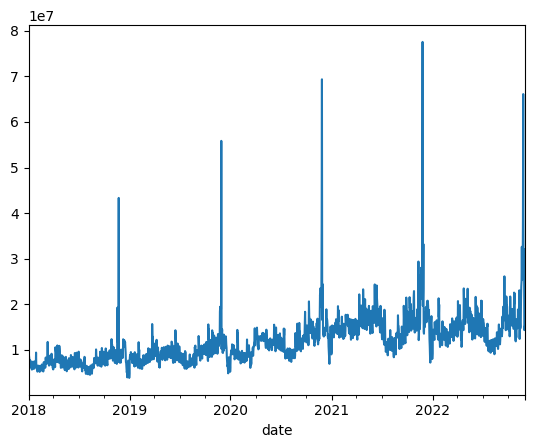

In [69]:
#INDEX: 1
df['y'].plot()
plt.savefig('../visualizations/EDA/plot_y.png')
plt.show()

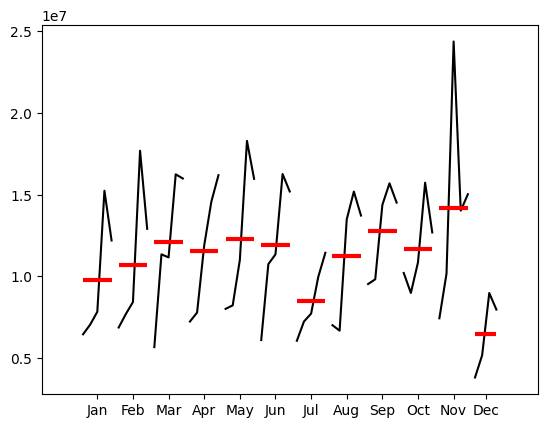

In [70]:
month_plot(df['y'].asfreq('ME'))
plt.savefig('../visualizations/EDA/month_plot.png')
plt.show()

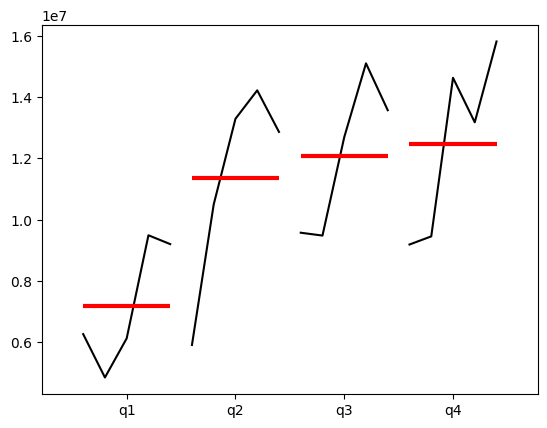

In [71]:
quarter_plot(df['y'].asfreq('QS'))
plt.savefig('../visualizations/EDA/quater_plot.png')
plt.show()

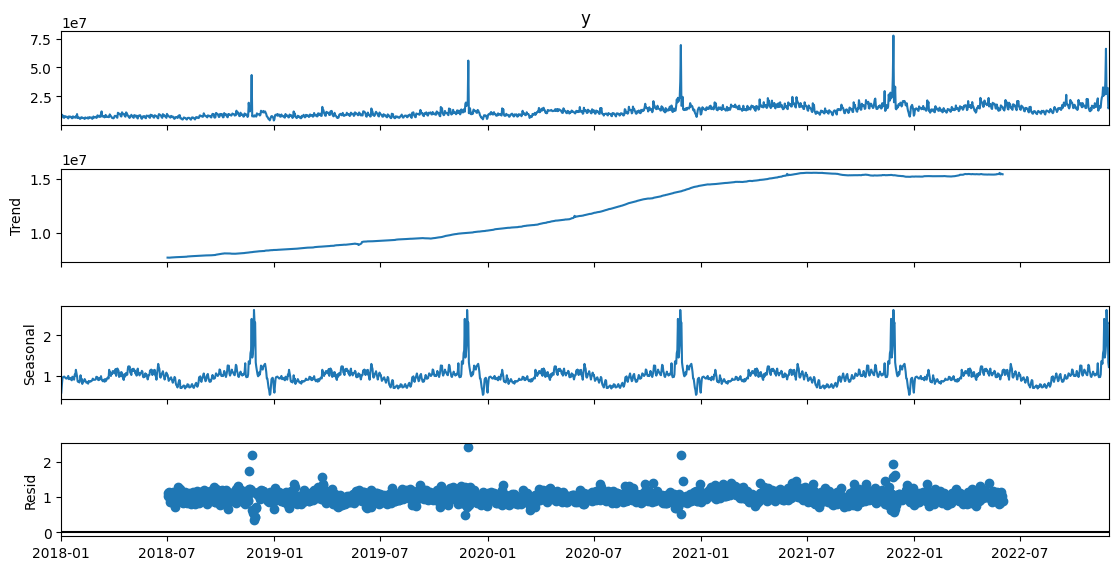

In [ ]:
decomoposition = seasonal_decompose(df['y'],model='mul',period=365)
fig = decomoposition.plot()
fig.set_size_inches(12,6)
plt.savefig("../visualizations/EDA/seasonal_decompostion.png")
plt.show()

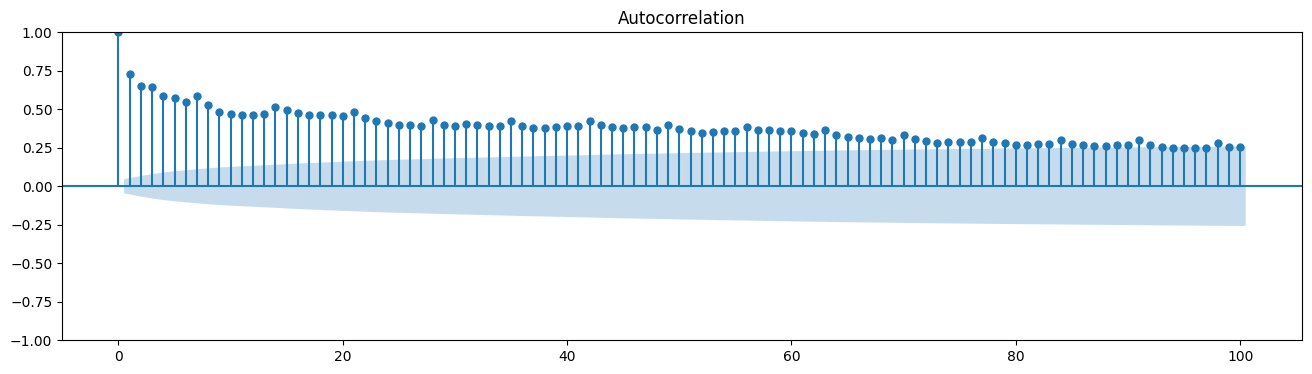

In [47]:
figs,ax = plt.subplots(figsize=(16,4))
plot_acf(df['y'],lags=100,ax=ax)
plt.savefig('../visualizations/EDA/autoCorr.png')
plt.show()

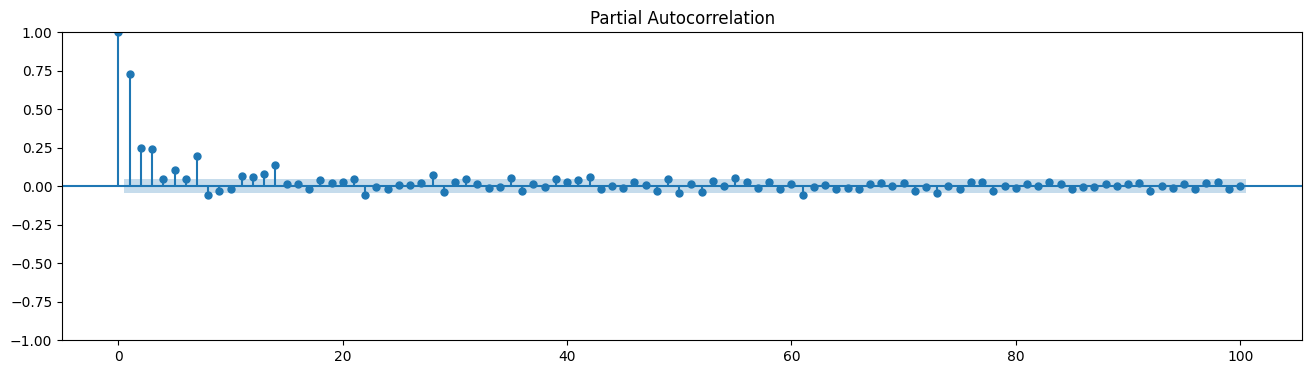

In [76]:
figs,ax = plt.subplots(figsize=(16,4))
plot_pacf(df['y'],lags=100,ax=ax)
plt.savefig('../visualizations/EDA/PartialAutoCorr.png')
plt.show()

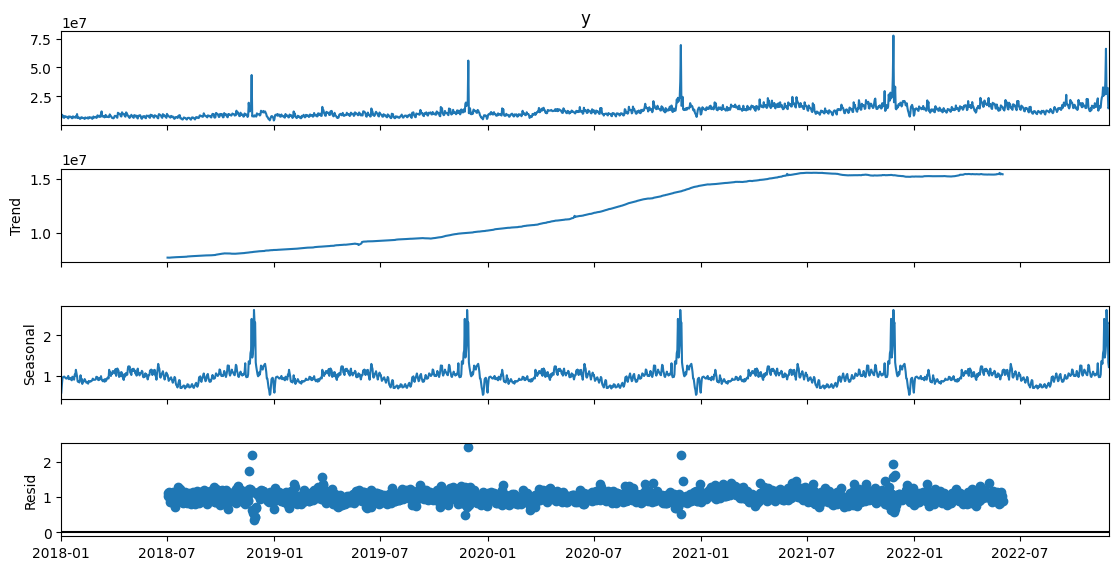

# Stationarity

## adfuller
- `adfuller(df.y)`: Runs the ADF test to check if the time series is stationary.
- `result`:         A tuple containing several values:
- `result[0]`:      ADF test statistic
- `result[1]`:      p-value (used to determine stationarity)
- `result[2]`:      Number of lags used in the test
- `result[3]`:      Number of observations used
- `result[4]`:      Critical values at 1%, 5%, and 10% levels
- `result[5]`:      Information criterion (if applicable)

In [87]:
result = adfuller(df.y)
print(f"result: {result}")
print(f"p-value: {result[1]:.6f}")
if result[1] < 0.05:
    print('Evidence Suggests that the time series is stationary')
else:
    print('Evidence Suggests that the time series is not stationary')

result: (np.float64(-2.5583995323513893), np.float64(0.10190360862386194), 21, 1773, {'1%': np.float64(-3.4340436225819664), '5%': np.float64(-2.8631715289228103), '10%': np.float64(-2.567638575476797)}, np.float64(57965.93222671933))
p-value: 0.101904
Evidence Suggests that the time series is not stationary


## Difference the series to make it stationary

In [89]:
df['y_diff'] = df.y.diff().dropna()
df['y_diff']

date
2018-01-01           NaN
2018-01-02     2651237.0
2018-01-03     -475975.0
2018-01-04     -660303.0
2018-01-05    -1410495.0
                 ...    
2022-11-26   -39180777.0
2022-11-27     4955921.0
2022-11-28      210050.0
2022-11-29   -17786305.0
2022-11-30      712049.0
Freq: D, Name: y_diff, Length: 1795, dtype: float64

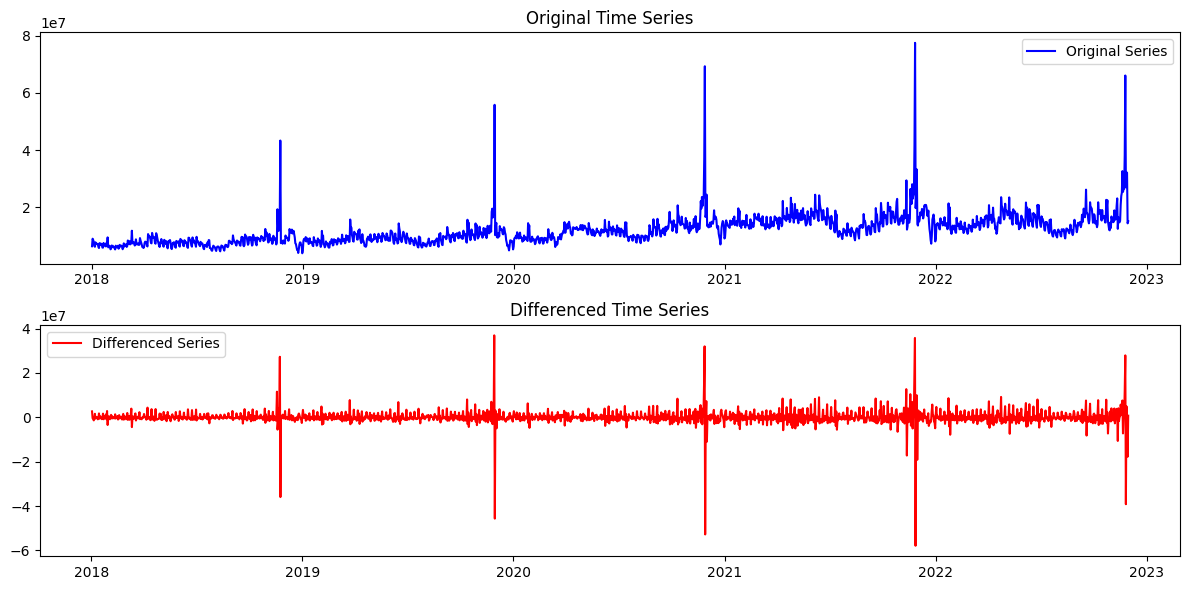

In [104]:
plt.figure(figsize=(12,6))

# First subplot: Original Series
plt.subplot(2,1,1)  
plt.plot(df['y'], label='Original Series', color='blue')
plt.title('Original Time Series')
plt.legend()

# Second subplot: Differenced Series
plt.subplot(2,1,2)  
plt.plot(df['y_diff'], label='Differenced Series', color='red')
plt.title('Differenced Time Series')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('../visualizations/EDA/Stationary-vs-NonStationary.png')
plt.show()


In [103]:
result = adfuller(df['y_diff'].dropna())
print(f"result: {result}")
print(f"p-value: {result[1]:.6f}")
if result[1] < 0.05:
    print('Evidence Suggests that the time series is stationary')
else:
    print('Evidence Suggests that the time series is not stationary')

result: (np.float64(-12.808786916716002), np.float64(6.513792026816299e-24), 20, 1773, {'1%': np.float64(-3.4340436225819664), '5%': np.float64(-2.8631715289228103), '10%': np.float64(-2.567638575476797)}, np.float64(57938.80449422392))
p-value: 0.000000
Evidence Suggests that the time series is stationary


In [105]:
df

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0
...,...,...,...,...
2022-11-26,26934947.0,30.41%,0.38%,-39180777.0
2022-11-27,31890868.0,29.75%,0.35%,4955921.0
2022-11-28,32100918.0,25.27%,8.93%,210050.0


In [108]:
os.makedirs(os.path.join('..','data'),exist_ok=True)
df.to_csv(os.path.join('..','data','preprocessed_data.csv'))